Датасет `data.csv` містить дані про кредитування. Цільовою змінною є `loan_status` -- приймає 5 значень:

* *Charged Off* (кредит не повернуто)
* *Late (31-120 days)*
* *Late (16-30 days)* 
* *In Grace Period* 
* *Fully Paid*  

Файл `description.csv` не використовується у завданні, він містить повні назви ознак.

Датасет `predict.csv` не містить значень цільової змінної і призначений для зовнішнього оцінювання.



### 1. Імпортувати датасет data.csv у об'єкт DataFrame і провести попередній аналіз даних засобами pandas, matplotlib, seaborn. Кожен графік чи візуалізація повинен супроводжуватися висновками.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Data з значеннями NaN - df_start

In [5]:
df_start = pd.read_csv('data.csv')
df_start

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,Fully Paid,21.12,1.0,...,78.0,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0
1,15000,21.49,409.95,D,NaN,RENT,38251.2,Charged Off,30.98,0.0,...,0.0,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,Fully Paid,16.57,0.0,...,0.0,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,Charged Off,9.70,0.0,...,15.0,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,Fully Paid,16.59,0.0,...,0.0,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,C,10+ years,MORTGAGE,80000.0,Fully Paid,8.62,0.0,...,0.0,0.00,0.000,26244.05,0.0,Individual,0.0,4812.0,110260.0,20600.0
19496,3000,12.74,100.71,C,10+ years,MORTGAGE,109000.0,Fully Paid,34.29,1.0,...,0.0,0.00,0.000,2978.46,0.0,Individual,0.0,0.0,260585.0,46600.0
19497,17000,11.12,557.53,B,7 years,MORTGAGE,75000.0,Fully Paid,20.77,0.0,...,0.0,0.00,0.000,2785.60,0.0,Individual,0.0,NaN,NaN,NaN
19498,30000,8.18,942.59,B,7 years,RENT,175000.0,Fully Paid,7.19,2.0,...,0.0,0.00,0.000,3.80,0.0,Individual,0.0,0.0,88348.0,48000.0


In [6]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   19500 non-null  int64  
 1   int_rate                    19500 non-null  float64
 2   installment                 19500 non-null  float64
 3   grade                       19500 non-null  object 
 4   emp_length                  18281 non-null  object 
 5   home_ownership              19500 non-null  object 
 6   annual_inc                  19500 non-null  float64
 7   loan_status                 19500 non-null  object 
 8   dti                         19495 non-null  float64
 9   delinq_2yrs                 19500 non-null  float64
 10  inq_last_6mths              19500 non-null  float64
 11  mths_since_last_delinq      9868 non-null   float64
 12  open_acc                    19500 non-null  float64
 13  pub_rec                     195

In [7]:
df_start.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

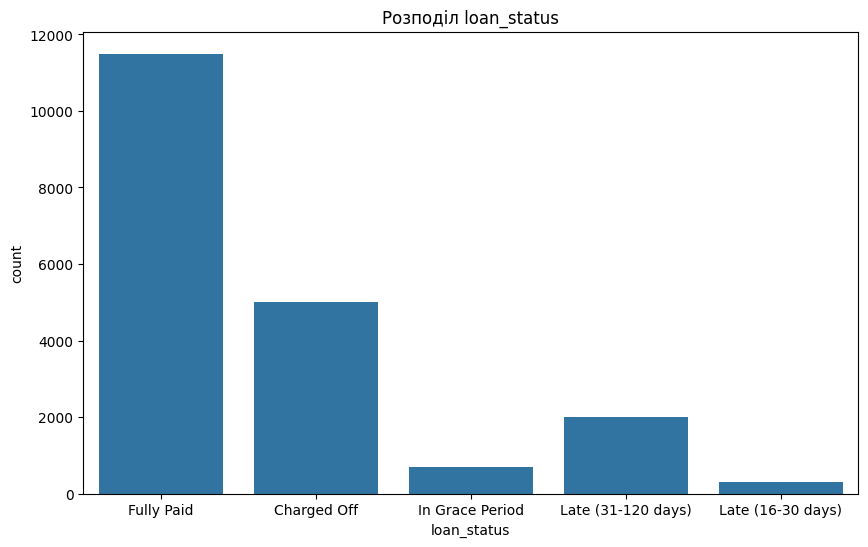

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df_start)
plt.title('Розподіл loan_status')
plt.show()

In [9]:
all_values = df_start['loan_status'].unique()
print(all_values)

['Fully Paid' 'Charged Off' 'In Grace Period' 'Late (31-120 days)'
 'Late (16-30 days)']


In [10]:
#перевірка на наявність нанів
nan_na = df_start.isna().any().any()
print(nan_na)

True


In [11]:
nan_counts = df_start.isna().sum()
print("Кількість NaN в кожні колонці:")
print(nan_counts)

Кількість NaN в кожні колонці:
loan_amnt                        0
int_rate                         0
installment                      0
grade                            0
emp_length                    1219
home_ownership                   0
annual_inc                       0
loan_status                      0
dti                              5
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq        9632
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      14
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med       0
application_type                 0
acc_now_delinq          

In [12]:
df_start['y_reg'] = (df_start['loan_status'] == 'Charged Off').astype(int)

df_start = df_start.drop(columns=['loan_status'])
df_start

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y_reg
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,21.12,1.0,2.0,...,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0,0
1,15000,21.49,409.95,D,NaN,RENT,38251.2,30.98,0.0,0.0,...,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0,1
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,16.57,0.0,2.0,...,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0,0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,9.70,0.0,0.0,...,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0,1
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,16.59,0.0,1.0,...,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,C,10+ years,MORTGAGE,80000.0,8.62,0.0,0.0,...,0.00,0.000,26244.05,0.0,Individual,0.0,4812.0,110260.0,20600.0,0
19496,3000,12.74,100.71,C,10+ years,MORTGAGE,109000.0,34.29,1.0,0.0,...,0.00,0.000,2978.46,0.0,Individual,0.0,0.0,260585.0,46600.0,0
19497,17000,11.12,557.53,B,7 years,MORTGAGE,75000.0,20.77,0.0,1.0,...,0.00,0.000,2785.60,0.0,Individual,0.0,NaN,NaN,NaN,0
19498,30000,8.18,942.59,B,7 years,RENT,175000.0,7.19,2.0,0.0,...,0.00,0.000,3.80,0.0,Individual,0.0,0.0,88348.0,48000.0,0


In [13]:
df_numeric = df_start.select_dtypes('number')
df = df_numeric
df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y_reg
0,24000,10.49,779.95,89000.0,21.12,1.0,2.0,31.0,8.0,0.0,...,78.0,0.00,0.000,16901.45,1.0,0.0,0.0,70116.0,43670.0,0
1,15000,21.49,409.95,38251.2,30.98,0.0,0.0,NaN,11.0,0.0,...,0.0,1614.60,145.314,409.95,1.0,0.0,273.0,31306.0,21600.0,1
2,24000,6.97,740.73,92000.0,16.57,0.0,2.0,NaN,11.0,0.0,...,0.0,0.00,0.000,12074.88,0.0,0.0,0.0,196318.0,68900.0,0
3,6500,19.22,238.99,25000.0,9.70,0.0,0.0,NaN,5.0,0.0,...,15.0,127.05,22.869,238.99,0.0,0.0,0.0,6848.0,16700.0,1
4,20000,11.22,656.86,58000.0,16.59,0.0,1.0,36.0,13.0,0.0,...,0.0,0.00,0.000,20101.30,0.0,0.0,0.0,426287.0,26100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,80000.0,8.62,0.0,0.0,NaN,9.0,0.0,...,0.0,0.00,0.000,26244.05,0.0,0.0,4812.0,110260.0,20600.0,0
19496,3000,12.74,100.71,109000.0,34.29,1.0,0.0,6.0,14.0,0.0,...,0.0,0.00,0.000,2978.46,0.0,0.0,0.0,260585.0,46600.0,0
19497,17000,11.12,557.53,75000.0,20.77,0.0,1.0,37.0,8.0,0.0,...,0.0,0.00,0.000,2785.60,0.0,0.0,NaN,NaN,NaN,0
19498,30000,8.18,942.59,175000.0,7.19,2.0,0.0,5.0,5.0,0.0,...,0.0,0.00,0.000,3.80,0.0,0.0,0.0,88348.0,48000.0,0


## Заповнення NaN середніми значеннями відповідної колонки, окрім 'emp_length'(бо це Object)

In [14]:
df.fillna(df.mean(), inplace=True)
df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,y_reg
0,24000,10.49,779.95,89000.0,21.12,1.0,2.0,31.000000,8.0,0.0,...,78.0,0.00,0.000,16901.45,1.0,0.0,0.000000,70116.00000,43670.0000,0
1,15000,21.49,409.95,38251.2,30.98,0.0,0.0,34.047021,11.0,0.0,...,0.0,1614.60,145.314,409.95,1.0,0.0,273.000000,31306.00000,21600.0000,1
2,24000,6.97,740.73,92000.0,16.57,0.0,2.0,34.047021,11.0,0.0,...,0.0,0.00,0.000,12074.88,0.0,0.0,0.000000,196318.00000,68900.0000,0
3,6500,19.22,238.99,25000.0,9.70,0.0,0.0,34.047021,5.0,0.0,...,15.0,127.05,22.869,238.99,0.0,0.0,0.000000,6848.00000,16700.0000,1
4,20000,11.22,656.86,58000.0,16.59,0.0,1.0,36.000000,13.0,0.0,...,0.0,0.00,0.000,20101.30,0.0,0.0,0.000000,426287.00000,26100.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,80000.0,8.62,0.0,0.0,34.047021,9.0,0.0,...,0.0,0.00,0.000,26244.05,0.0,0.0,4812.000000,110260.00000,20600.0000,0
19496,3000,12.74,100.71,109000.0,34.29,1.0,0.0,6.000000,14.0,0.0,...,0.0,0.00,0.000,2978.46,0.0,0.0,0.000000,260585.00000,46600.0000,0
19497,17000,11.12,557.53,75000.0,20.77,0.0,1.0,37.000000,8.0,0.0,...,0.0,0.00,0.000,2785.60,0.0,0.0,222.111541,136142.49533,31819.2562,0
19498,30000,8.18,942.59,175000.0,7.19,2.0,0.0,5.000000,5.0,0.0,...,0.0,0.00,0.000,3.80,0.0,0.0,0.000000,88348.00000,48000.0000,0


## Знаходження та виведення викидів

In [15]:
outliers_dict = {}
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_dict[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

for column, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)

Outliers in loan_amnt:
83       40000
804      40000
835      40000
1068     40000
1261     40000
         ...  
18794    40000
18954    38400
19123    40000
19352    40000
19417    40000
Name: loan_amnt, Length: 149, dtype: int64
Outliers in int_rate:
6        30.94
142      30.84
233      29.99
253      28.72
270      27.27
         ...  
19221    29.69
19227    30.99
19300    29.96
19369    30.65
19393    26.99
Name: int_rate, Length: 297, dtype: float64
Outliers in installment:
48       1309.49
69       1269.73
83       1229.06
163      1281.90
189      1300.55
          ...   
19300    1131.51
19346    1190.62
19352    1251.43
19356    1140.53
19470    1162.47
Name: installment, Length: 616, dtype: float64
Outliers in annual_inc:
21       185000.0
34       160000.0
83       158750.0
125      250000.0
131      240000.0
           ...   
19411    180000.0
19422    300000.0
19449    168000.0
19459    240000.0
19498    175000.0
Name: annual_inc, Length: 930, dtype: float64
Outliers in

## Знаходження середнього значення, для кожної числової колонки

In [16]:
columns = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
    'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]
      
means = df[columns].mean()
print(means)

loan_amnt                      14821.008974
int_rate                          13.906393
installment                      448.408998
annual_inc                     75808.517199
dti                               18.597095
delinq_2yrs                        0.330769
inq_last_6mths                     0.664000
mths_since_last_delinq            34.047021
open_acc                          11.602462
pub_rec                            0.225333
revol_bal                      15980.357692
revol_util                        52.159525
total_acc                         24.727231
total_pymnt                    13113.027589
total_pymnt_inv                13094.771466
total_rec_prncp                10264.721714
total_rec_int                   2545.939345
total_rec_late_fee                 3.826898
recoveries                       298.539651
collection_recovery_fee           50.258535
last_pymnt_amnt                 4140.196449
collections_12_mths_ex_med         0.018256
acc_now_delinq                  

## Заміна викидів на середнє значення відповідної колонки

In [17]:
def replace_outliers_with_mean(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = df[column].mean()
        
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])
    
    return df

df_cleaned = replace_outliers_with_mean(df)
df = df_cleaned

In [18]:
outliers_dict = {}
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_dict[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

for column, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)

Outliers in int_rate:
85       26.06
247      26.30
349      25.82
428      25.82
498      25.83
         ...  
19196    26.57
19416    25.69
19451    26.24
19480    25.49
19492    25.57
Name: int_rate, Length: 276, dtype: float64
Outliers in installment:
33       1007.31
45       1084.55
98       1027.10
142      1029.92
162      1015.60
          ...   
19257    1095.00
19259    1017.07
19347    1088.56
19349    1007.79
19492    1039.03
Name: installment, Length: 282, dtype: float64
Outliers in annual_inc:
43       150000.0
129      151000.0
202      154000.0
244      150000.0
276      150000.0
           ...   
19300    150000.0
19349    150000.0
19401    155000.0
19410    150000.0
19432    150000.0
Name: annual_inc, Length: 283, dtype: float64
Outliers in dti:
17890    43.40
19343    43.15
Name: dti, dtype: float64
Outliers in delinq_2yrs:
0        0.330769
6        0.330769
7        0.330769
11       0.330769
15       0.330769
           ...   
19484    0.330769
19493    0.330769


## Перевірка на NaN в датасеті

In [19]:
nan_na = df.isna().any().any()
print(nan_na)
print('Це перемога!!!')

False
Це перемога!!!


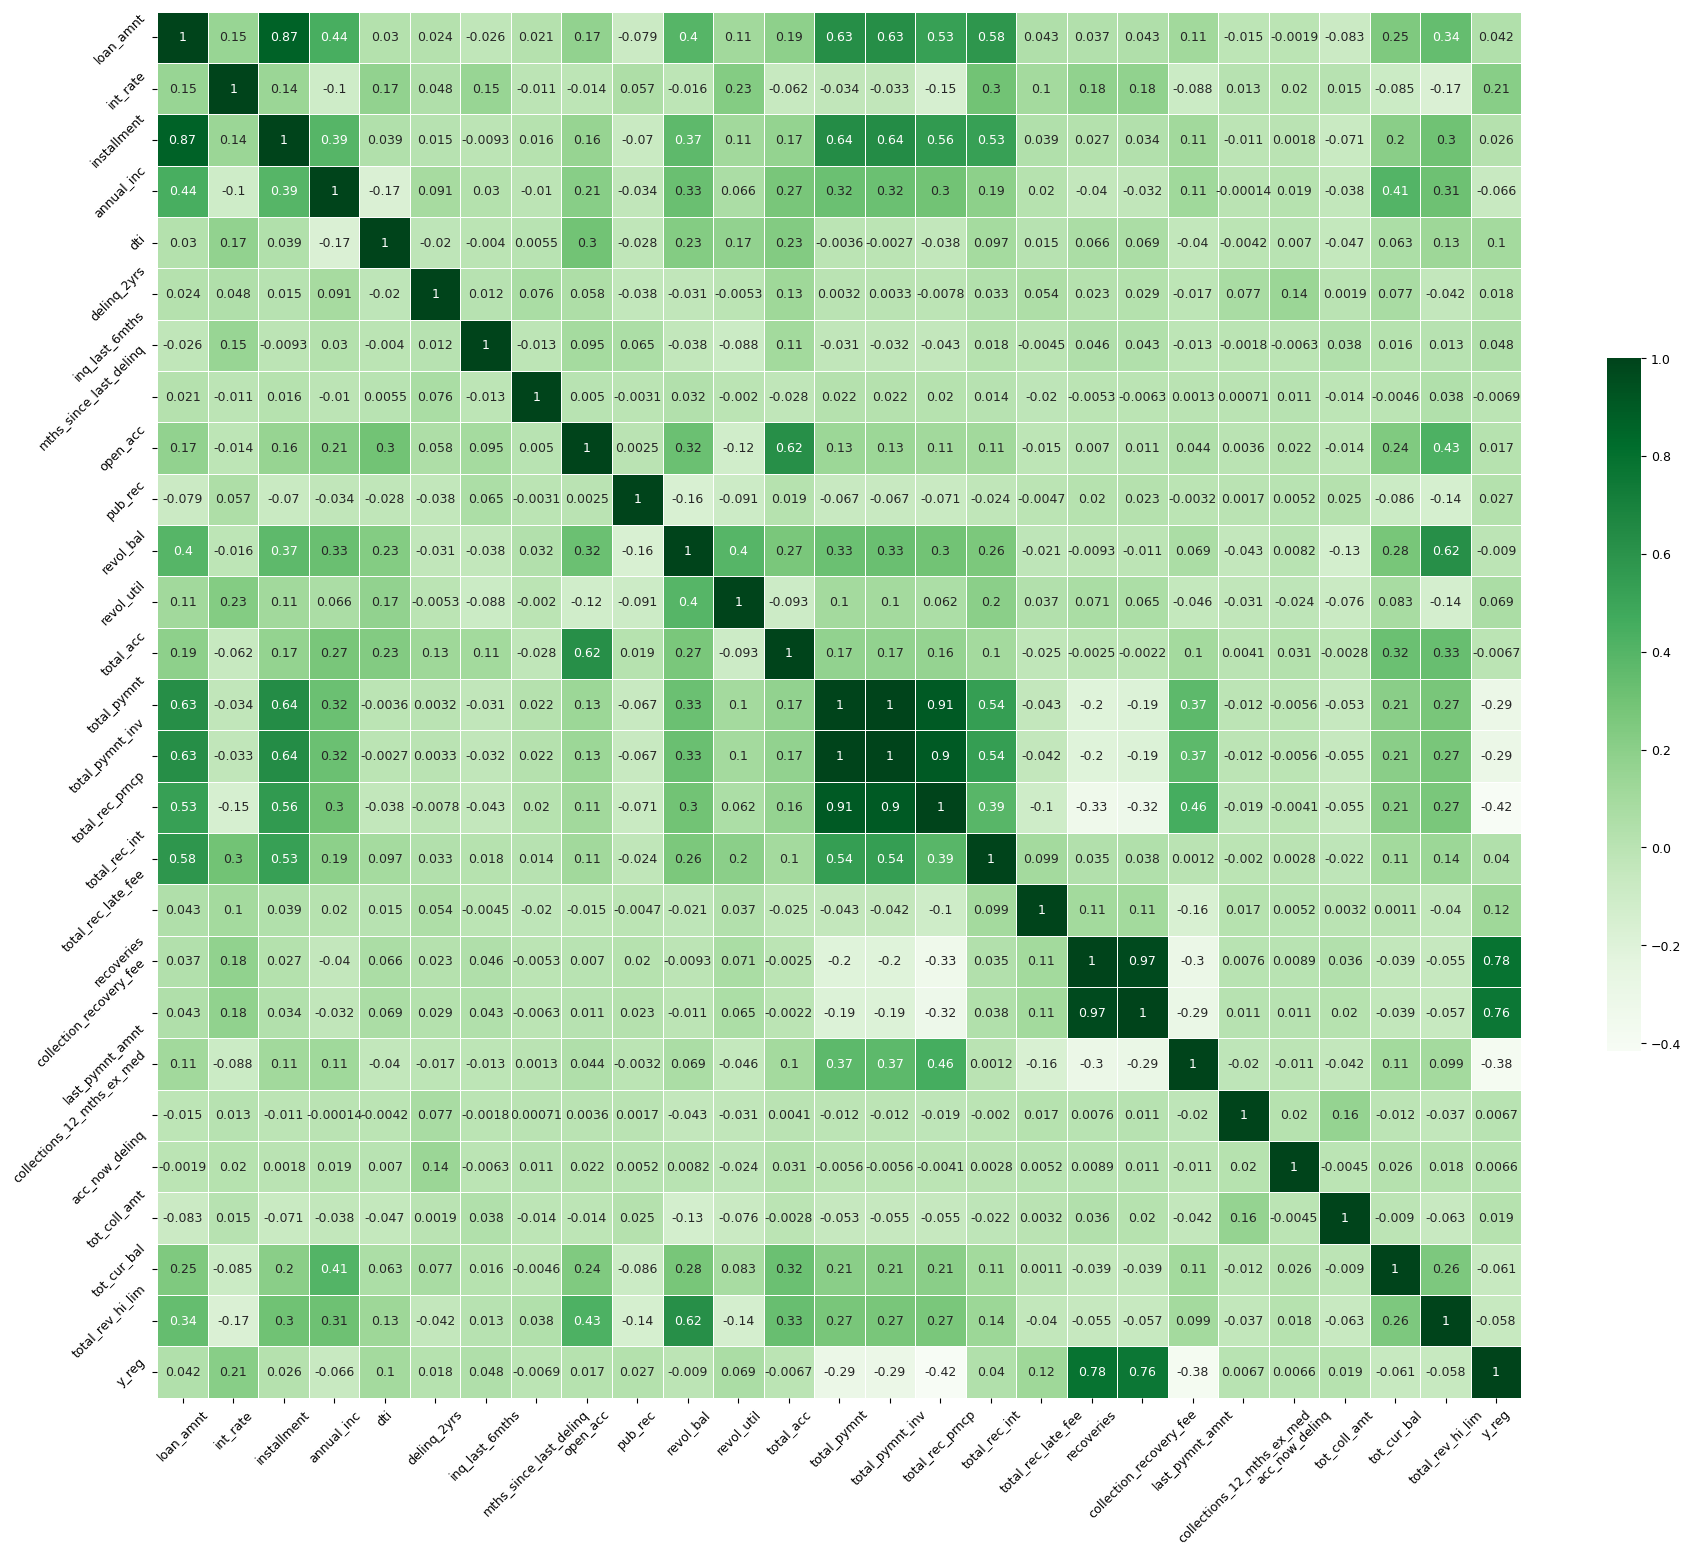

In [20]:
numerical_columns = list(df.select_dtypes(include=['int64', 'float64']))
corr = df[numerical_columns].corr()
plt.rc('font', size=9)
plt.figure(figsize=(22, 18))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, cmap = 'Greens')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Всі дані датасету у вигляді точок

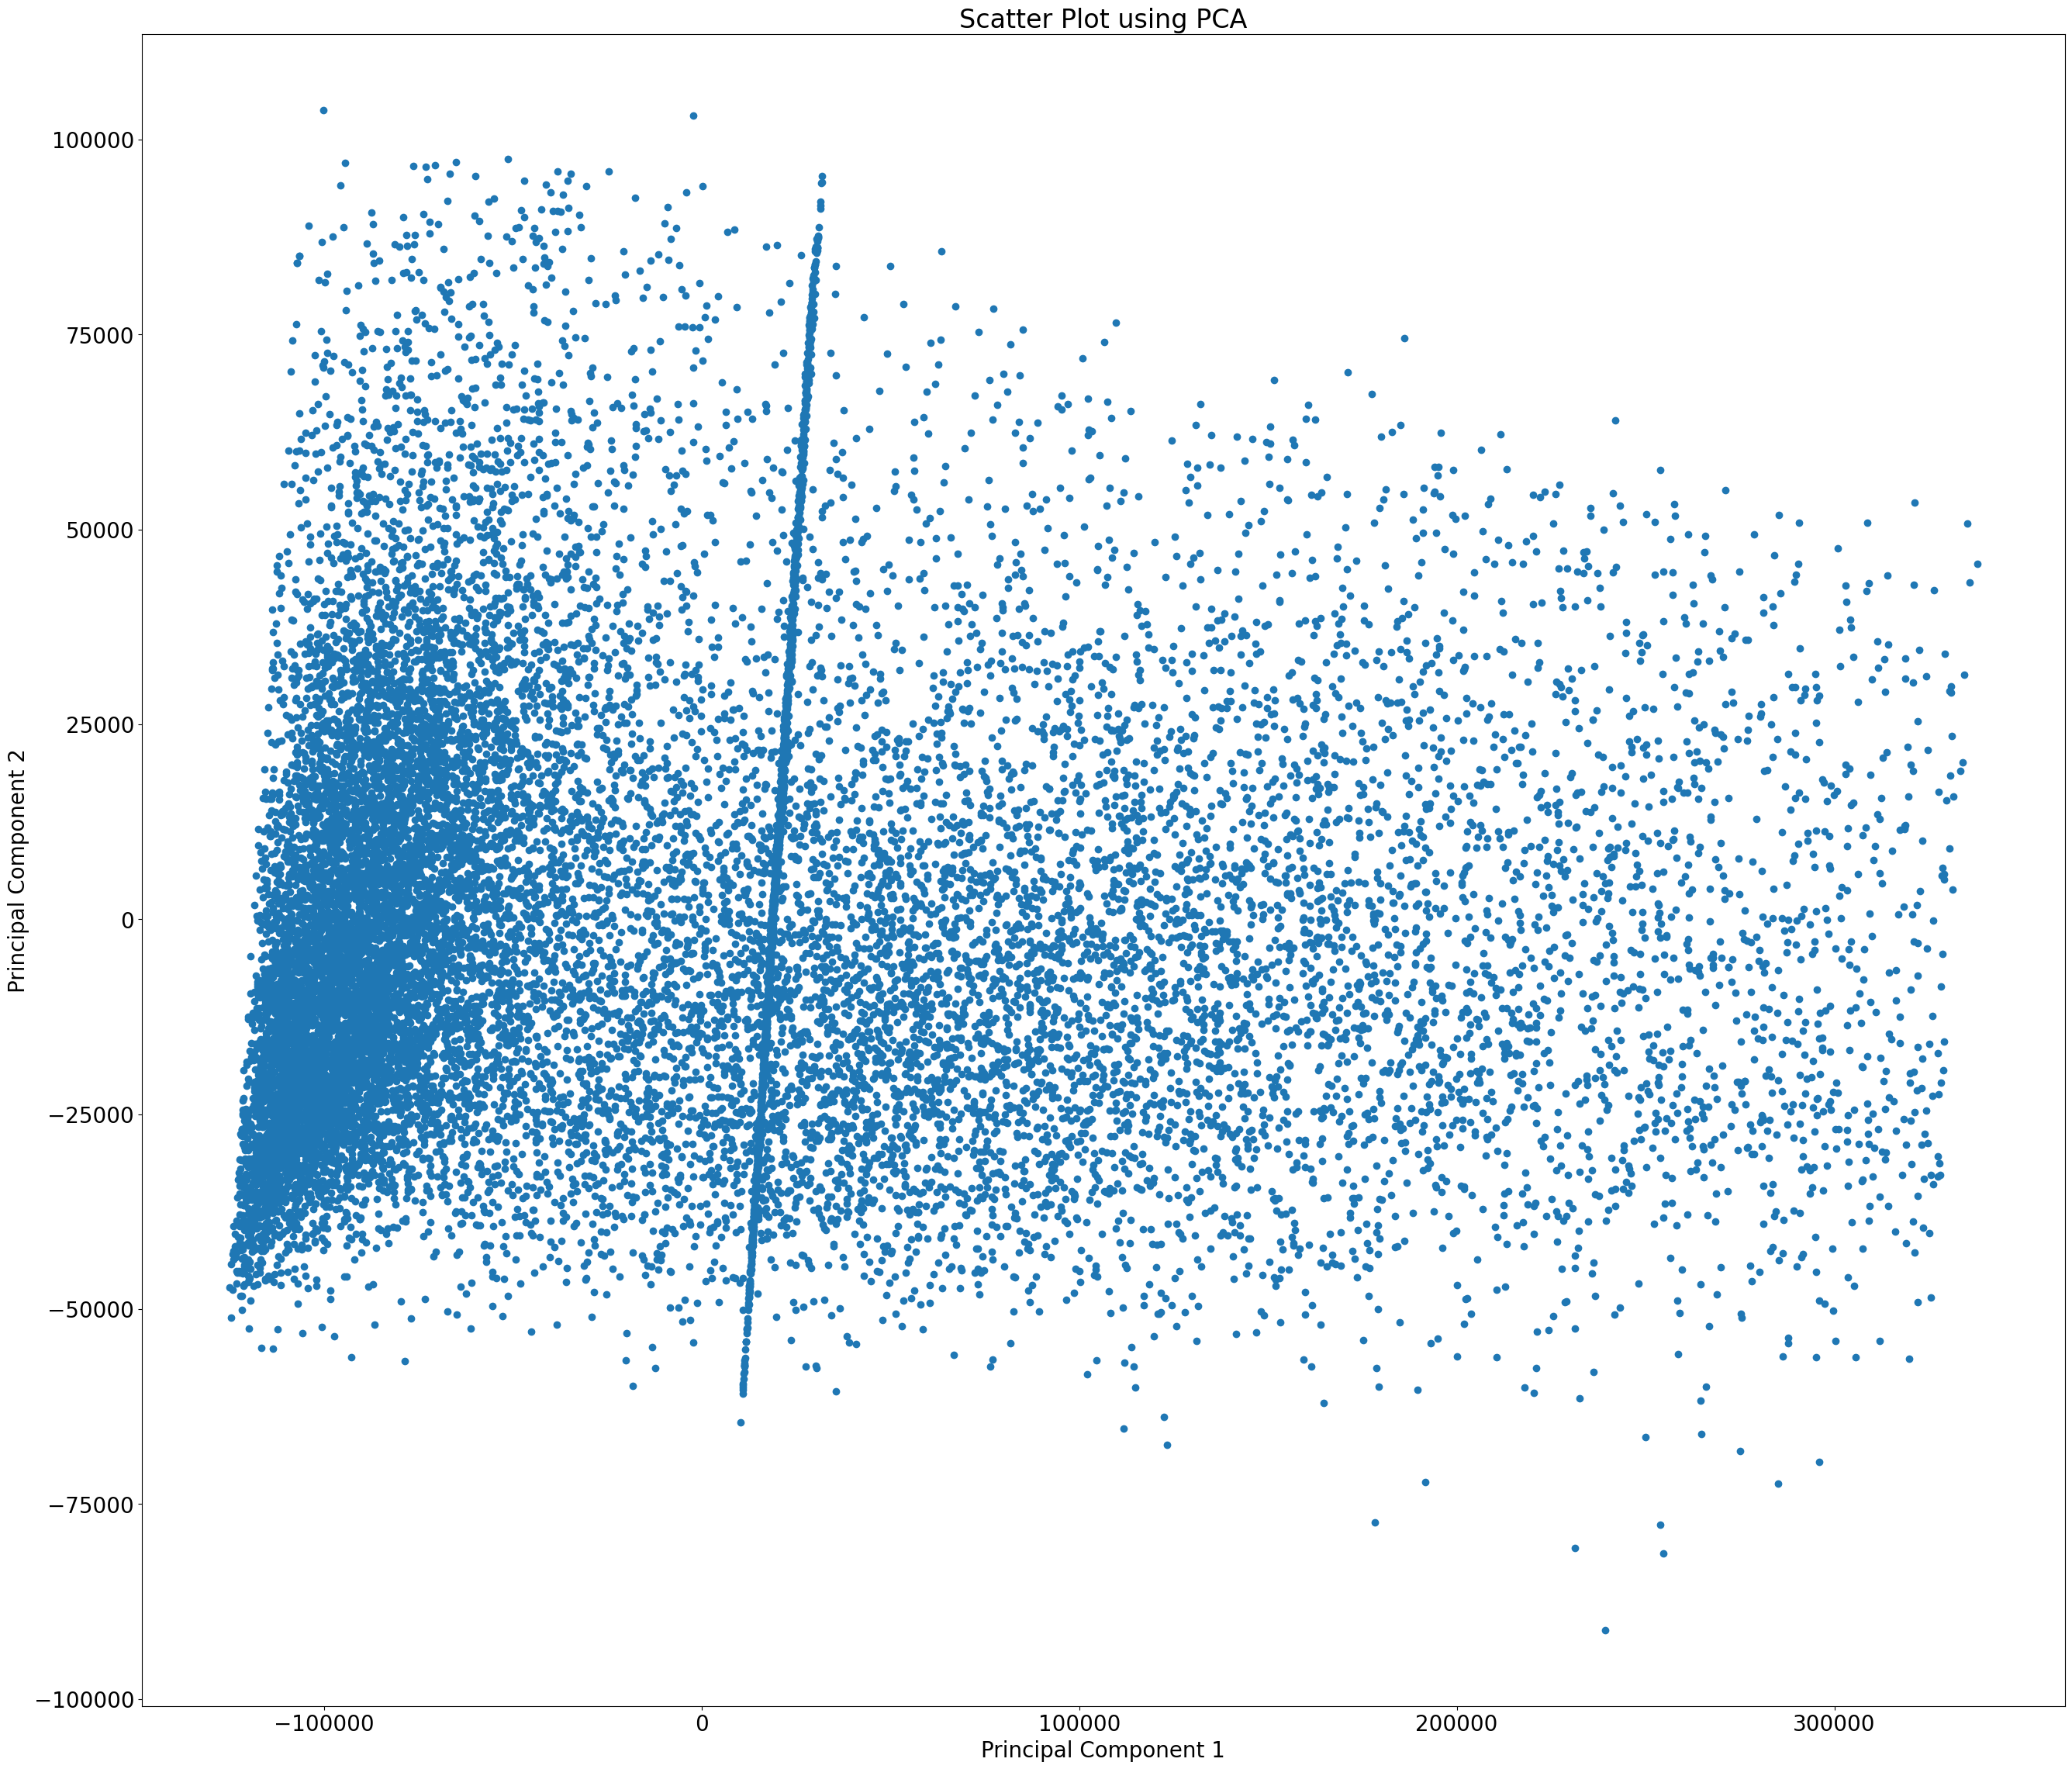

In [21]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

plt.rc('font', size=20)
plt.figure(figsize=(32, 28))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot using PCA")
plt.show()

## 2. **Задача регресії**. 

Створити нову цільову змінну `y_reg` яка приймає значення `1` якщо `loan_status` `==` `Charged Off` і `0` в інших випадках. Після цього вилучити з датасету `loan_status`. (Зверніть увагу: датасет містить неповні дані, тому варто розглянути різні стратегії роботи з пропусками в даних)

   * Навчити модель лінійної регресії, експерементуючи з параметрами регуляризації, кількістю і складом ознак.     Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель SVM Regressor (`sklearn.svm.SVR`), експерементуючи з параметрами регуляризації та ядра. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.

   * Навчити модель KNN Regressor (`sklearn.neighbors.KNeighborsRegressor`), експерементуючи з параметрами кількості сусідів та метрики. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель `sklearn.tree.DecisionTreeRegressor`, експерементуючи з параметрами `criterion`, `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.
    
   * Навчити модель `sklearn.ensemble.RandomForestRegressor`, експерементуючи з параметрами `n_estimators`, `max_depth`, `max_features`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.



In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [20]:
#Це я перевіряв, чи немає тут зайвих значень
print(df['y_reg'].value_counts())


y_reg
0.0    14500
1.0     5000
Name: count, dtype: int64


In [21]:
y = df['y_reg']
X = df.drop(columns=['y_reg'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso, Ridge
* Навчити модель лінійної регресії, експерементуючи з параметрами регуляризації, кількістю і складом ознак.     Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.

In [22]:
param_grid_ridge = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1, 10, 100],
    'ridge__solver': ['svd', 'lsqr', 'sparse_cg', 'saga'] 
}

param_grid_lasso = {
    'poly__degree': [1, 2, 3],
    'lasso__alpha': [0.1, 1, 10, 100],  
    'lasso__selection': ['cyclic', 'random']  
}

pipe_ridge = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

pipe_lasso = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())
])

grid_search_ridge = GridSearchCV(
    pipe_ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search_lasso = GridSearchCV(
    pipe_lasso,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

best_params_ridge = grid_search_ridge.best_params_
best_params_lasso = grid_search_lasso.best_params_

print(f"Найкращі параметри для Ridge: {best_params_ridge}")
print(f"Найкращі параметри для Lasso: {best_params_lasso}")

y_pred_ridge = grid_search_ridge.predict(X_test_scaled)
y_pred_lasso = grid_search_lasso.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Коефіцієнт детермінації для найкращої моделі Ridge на відкладеній вибірці: {r2_ridge}")
print(f"Коефіцієнт детермінації для найкращої моделі Lasso на відкладеній вибірці: {r2_lasso}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Найкращі параметри для Ridge: {'poly__degree': 2, 'ridge__alpha': 100, 'ridge__solver': 'sparse_cg'}
Найкращі параметри для Lasso: {'lasso__alpha': 0.1, 'lasso__selection': 'cyclic', 'poly__degree': 3}
Коефіцієнт детермінації для найкращої моделі Ridge на відкладеній вибірці: 0.7014350095800364
Коефіцієнт детермінації для найкращої моделі Lasso на відкладеній вибірці: 0.6154228989671156


# SVR
* Навчити модель SVM Regressor (`sklearn.svm.SVR`), експерементуючи з параметрами регуляризації та ядра. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.

In [23]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
}

svr = SVR()
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring='r2', cv=5, verbose=2, n_jobs=-1)
grid_search_svr.fit(X_train_scaled, y_train)

best_params_svr = grid_search_svr.best_params_
print(f'Найкращі параметри для SVR: {best_params_svr}')

best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Коефіцієнт детермінації для найкращої моделі SVR: R^2 = {r2_svr:.4f}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Найкращі параметри для SVR: {'C': 1, 'gamma': 'scale'}
Коефіцієнт детермінації для найкращої моделі SVR: R^2 = 0.6573


# KNN
* Навчити модель KNN Regressor (`sklearn.neighbors.KNeighborsRegressor`), експерементуючи з параметрами кількості сусідів та метрики. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.  

In [24]:
knn_regressor = KNeighborsRegressor()
n_neighbors_list = [5, 10, 20, 25, 35, 50]
metric_list = ['minkowski', 'manhattan', 'euclidean']

best_r2_knn = -float('inf')
best_params_knn = {}

for n_neighbors in n_neighbors_list:
    for metric in metric_list:
        knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors, metric=metric)
        knn_regressor.fit(X_train_scaled, y_train)
        y_pred_knn = knn_regressor.predict(X_test_scaled)
        r2_knn = r2_score(y_test, y_pred_knn)

        if r2_knn > best_r2_knn:
            best_r2_knn = r2_knn
            best_params_knn = {
                'n_neighbors': n_neighbors,
                'metric': metric
            }

        print("R^2:", r2_knn, "n_neighbors:", n_neighbors, "metric:", metric)

print("\nBest R^2 for KNN:", best_r2_knn)
print("Best parameters for KNN:", best_params_knn)

R^2: 0.6387093664036347 n_neighbors: 5 metric: minkowski
R^2: 0.6563090980489044 n_neighbors: 5 metric: manhattan
R^2: 0.6387093664036347 n_neighbors: 5 metric: euclidean
R^2: 0.6573666486893099 n_neighbors: 10 metric: minkowski
R^2: 0.6773295490495601 n_neighbors: 10 metric: manhattan
R^2: 0.6573666486893099 n_neighbors: 10 metric: euclidean
R^2: 0.66111377256334 n_neighbors: 20 metric: minkowski
R^2: 0.6813900212614881 n_neighbors: 20 metric: manhattan
R^2: 0.66111377256334 n_neighbors: 20 metric: euclidean
R^2: 0.6647507022718758 n_neighbors: 25 metric: minkowski
R^2: 0.6792858871725032 n_neighbors: 25 metric: manhattan
R^2: 0.6647507022718758 n_neighbors: 25 metric: euclidean
R^2: 0.6633370536274732 n_neighbors: 35 metric: minkowski
R^2: 0.6801662041560754 n_neighbors: 35 metric: manhattan
R^2: 0.6633370536274732 n_neighbors: 35 metric: euclidean
R^2: 0.6594008016494978 n_neighbors: 50 metric: minkowski
R^2: 0.6785030385749882 n_neighbors: 50 metric: manhattan
R^2: 0.65940080164949

# DecisionTreeRegressor
* Навчити модель `sklearn.tree.DecisionTreeRegressor`, експерементуючи з параметрами `criterion`, `max_depth`, `max_features`, `min_samples_split`, `min_samples_leaf`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.

In [25]:
decision_tree_regressor = DecisionTreeRegressor()
criterion_list = ['squared_error'] 
max_depth_list = [5, 10]
max_features_list = ['sqrt']  
min_samples_split_list = [5, 10]
min_samples_leaf_list = [1, 5]

best_r2_DT = -float('inf')
best_params_DT = {}

for criterion in criterion_list:
    for max_depth in max_depth_list:
        for max_features in max_features_list:
            for min_samples_split in min_samples_split_list:
                for min_samples_leaf in min_samples_leaf_list:
                    decision_tree_regressor = DecisionTreeRegressor(
                        criterion=criterion,
                        max_depth=max_depth,
                        max_features=max_features,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf
                    )
                    decision_tree_regressor.fit(X_train_scaled, y_train)
                    y_pred_DT = decision_tree_regressor.predict(X_test_scaled)
                    r2_DT = r2_score(y_test, y_pred_DT)

                    if r2_DT > best_r2_DT:
                        best_r2_DT = r2_DT
                        best_params_DT = {
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'max_features': max_features,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }

                    print("R^2:", r2_DT, "criterion:", criterion, "max_depth:", max_depth, "max_features:", max_features, "min_samples_split:", min_samples_split, "min_samples_leaf:", min_samples_leaf)

print("\nBest R^2 for Decision Tree:", best_r2_DT)
print("Best parameters for Decision Tree:", best_params_DT)

R^2: 0.5633285746133763 criterion: squared_error max_depth: 5 max_features: sqrt min_samples_split: 5 min_samples_leaf: 1
R^2: 0.5536619242818039 criterion: squared_error max_depth: 5 max_features: sqrt min_samples_split: 5 min_samples_leaf: 5
R^2: 0.5210706137787812 criterion: squared_error max_depth: 5 max_features: sqrt min_samples_split: 10 min_samples_leaf: 1
R^2: 0.6626357295503114 criterion: squared_error max_depth: 5 max_features: sqrt min_samples_split: 10 min_samples_leaf: 5
R^2: 0.6763654980928864 criterion: squared_error max_depth: 10 max_features: sqrt min_samples_split: 5 min_samples_leaf: 1
R^2: 0.6824006058503985 criterion: squared_error max_depth: 10 max_features: sqrt min_samples_split: 5 min_samples_leaf: 5
R^2: 0.6612318717516741 criterion: squared_error max_depth: 10 max_features: sqrt min_samples_split: 10 min_samples_leaf: 1
R^2: 0.6543711091534241 criterion: squared_error max_depth: 10 max_features: sqrt min_samples_split: 10 min_samples_leaf: 5

Best R^2 for De

#   RandomForestRegressor 
   * Навчити модель `sklearn.ensemble.RandomForestRegressor`, експерементуючи з параметрами `n_estimators`, `max_depth`, `max_features`. Знайти коефіцієнт детермінації для найкращої моделі на відкладеній вибірці.


In [26]:
param_grid_rf = {
    'n_estimators': [300, 500, 700, 900],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None], 
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)
grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_
print("Найкращі параметри для RandomForestRegressor:", best_params_rf)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
print("Коефіцієнт детермінації для найкращої моделі RandomForestRegressor на відкладеній вибірці:", r2_rf)

Найкращі параметри для RandomForestRegressor: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 900}
Коефіцієнт детермінації для найкращої моделі RandomForestRegressor на відкладеній вибірці: 0.7197185449130319


### 3. Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_reg.csv`.



In [27]:
r2_scores = {
    "Ridge": r2_ridge,
    "Lasso": r2_lasso,
    "SVR": r2_svr,
    "KNN": best_r2_knn,
    "DecisionTree": best_r2_DT,
    "RandomForest": r2_rf
}

best_model_name = max(r2_scores, key=r2_scores.get)
best_r2_score = r2_scores[best_model_name]

print(f"Найкраща модель для регресії: {best_model_name} з R^2 = {best_r2_score}")

predict_df = pd.read_csv("predict.csv")
predict_df = predict_df[X_train.columns]
predict_df_scaled = scaler.transform(predict_df) 

if best_model_name == "Ridge":
    predictions = grid_search_ridge.predict(predict_df_scaled)
elif best_model_name == "Lasso":
    predictions = grid_search_lasso.predict(predict_df_scaled)
elif best_model_name == "SVR":
    predictions = best_svr.predict(predict_df_scaled)
elif best_model_name == "KNN":
    knn_regressor = KNeighborsRegressor(n_neighbors=best_params_knn['n_neighbors'], metric=best_params_knn['metric'])
    knn_regressor.fit(X_train_scaled, y_train)
    predictions = knn_regressor.predict(predict_df_scaled)
elif best_model_name == "DecisionTree":
    decision_tree_regressor = DecisionTreeRegressor(
        criterion=best_params_DT['criterion'],
        max_depth=best_params_DT['max_depth'],
        max_features=best_params_DT['max_features'],
        min_samples_split=best_params_DT['min_samples_split'],
        min_samples_leaf=best_params_DT['min_samples_leaf']
    )
    decision_tree_regressor.fit(X_train_scaled, y_train)
    predictions = decision_tree_regressor.predict(predict_df_scaled)
elif best_model_name == "RandomForest":
    predictions = best_rf.predict(predict_df_scaled)

print(f"Передбачення з використанням найкращої моделі {best_model_name}: {predictions}")

Найкраща модель для регресії: RandomForest з R^2 = 0.7197185449130319
Передбачення з використанням найкращої моделі RandomForest: [0.37330674 0.05       0.89       ... 0.34007825 0.02777778 0.11111111]


In [28]:
# Зберегти прогнози у змінну best_reg_model_predictions
best_reg_model_predictions = None

if best_model_name == "Ridge":
    best_reg_model_predictions = grid_search_ridge.predict(predict_df_scaled)
elif best_model_name == "Lasso":
    best_reg_model_predictions = grid_search_lasso.predict(predict_df_scaled)
elif best_model_name == "SVR":
    best_reg_model_predictions = best_svr.predict(predict_df_scaled)
elif best_model_name == "KNN":
    best_reg_model_predictions = knn_regressor.predict(predict_df_scaled)
elif best_model_name == "DecisionTree":
    best_reg_model_predictions = decision_tree_regressor.predict(predict_df_scaled)
elif best_model_name == "RandomForest":
    best_reg_model_predictions = best_rf.predict(predict_df_scaled)

print("Найкраща модель для регресії:", best_model_name)
print("Передбачення з використанням найкращої моделі:", best_reg_model_predictions)

Найкраща модель для регресії: RandomForest
Передбачення з використанням найкращої моделі: [0.37330674 0.05       0.89       ... 0.34007825 0.02777778 0.11111111]


In [29]:
# Запустити для створення файлу
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')

## 4. **Задача класифікації**. 

Імпортувати наново датасет `data.csv`. Вважаючи `loan_status` цільовою змінною розв'язати задачу п'ятикласової класифікації. Використати різні підходи експерементуючи з параметрами як у пункті 2. Розглянути :

   * логістичну регресію
   * метод опорних векторів (`sklearn.svm.SVC`)
   * метод найближчих сусідів (`sklearn.neighbors.KNeighborsClassifier`)
   * дерево прийняття рішень (`sklearn.tree.DecisionTreeClassifier`)
   * випадковий ліс (`sklearn.ensemble.RandomForestClassifier`)

   В кожному випадку знайти середню точність для найкращої моделі на відкладеній вибірці.




In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv')

for column in data.columns:
    if data[column].dtype == np.number:
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

label_encoder = LabelEncoder()
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

X = data.drop('loan_status', axis=1)
y = data['loan_status']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
nan_na = data.isna().any().any()
print(nan_na)

False


In [36]:
data

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000,10.49,779.95,B,3 years,MORTGAGE,89000.0,1,21.12,1.0,...,78.0,0.00,0.000,16901.45,1.0,Individual,0.0,0.0,70116.0,43670.0
1,15000,21.49,409.95,D,10+ years,RENT,38251.2,0,30.98,0.0,...,0.0,1614.60,145.314,409.95,1.0,Individual,0.0,273.0,31306.0,21600.0
2,24000,6.97,740.73,A,2 years,MORTGAGE,92000.0,1,16.57,0.0,...,0.0,0.00,0.000,12074.88,0.0,Individual,0.0,0.0,196318.0,68900.0
3,6500,19.22,238.99,D,4 years,MORTGAGE,25000.0,0,9.70,0.0,...,15.0,127.05,22.869,238.99,0.0,Individual,0.0,0.0,6848.0,16700.0
4,20000,11.22,656.86,B,10+ years,OWN,58000.0,1,16.59,0.0,...,0.0,0.00,0.000,20101.30,0.0,Individual,0.0,0.0,426287.0,26100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,26000,14.08,606.06,C,10+ years,MORTGAGE,80000.0,1,8.62,0.0,...,0.0,0.00,0.000,26244.05,0.0,Individual,0.0,4812.0,110260.0,20600.0
19496,3000,12.74,100.71,C,10+ years,MORTGAGE,109000.0,1,34.29,1.0,...,0.0,0.00,0.000,2978.46,0.0,Individual,0.0,0.0,260585.0,46600.0
19497,17000,11.12,557.53,B,7 years,MORTGAGE,75000.0,1,20.77,0.0,...,0.0,0.00,0.000,2785.60,0.0,Individual,0.0,0.0,73219.0,23500.0
19498,30000,8.18,942.59,B,7 years,RENT,175000.0,1,7.19,2.0,...,0.0,0.00,0.000,3.80,0.0,Individual,0.0,0.0,88348.0,48000.0


In [37]:
class_labels = label_encoder.classes_

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'max_iter': [100, 200, 300, 400, 500]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 10000],
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}
best_estimators = {}

In [38]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred_best)

results, best_model_name

print("Найкраща модель:", best_model_name)
print("Точність найкращої моделі на тестовій вибірці:", results[best_model_name])

print("\nРезультати усіх моделей:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

Найкраща модель: Logistic Regression
Точність найкращої моделі на тестовій вибірці: 0.8646153846153846

Результати усіх моделей:
Logistic Regression: 0.8646
SVM: 0.8446
KNN: 0.7059
Decision Tree: 0.8303
Random Forest: 0.8641


### 5. Зробити висновки і обрати найкращу модель яка розв'язує задачу класифікації. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_clf.csv`.
    


In [39]:
# Зберегти прогнози у змінну best_clf_model_predictions
best_clf_model_predictions = pd.DataFrame({'loan_status': y_pred_labels})

In [40]:
# Запустити для створення файлу
best_clf_model_predictions.to_csv('predict_clf.csv', index=False)

## 6. **Задача двокласової класифікації**. 

Перетворити цільову змінну `loan_status` на бінарну : `1` якщо `Charged Off`, `0` в інших випадках. Застосувати підходи з пункту 4 і визначити найкращу модель. Для найкращих моделей кожного типу знайти `precision`, `recall`, `roc_auc_score` та зобразити криві `precision-recall` та `roc`. Зробити висновки.



In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve, roc_curve

warnings.filterwarnings('ignore')

data = pd.read_csv('data.csv')

for column in data.columns:
    if data[column].dtype == np.number:
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

data['loan_status_binary'] = np.where(data['loan_status'] == 'Charged Off', 1, 0)

data.drop('loan_status', axis=1, inplace=True)

X = data.drop('loan_status_binary', axis=1)
y = data['loan_status_binary']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}
best_estimators = {}

In [93]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Precision': precision, 'Recall': recall, 'ROC AUC': roc_auc}
    best_estimators[name] = model

best_model_name = max(results, key=lambda x: results[x]['Precision'])
best_model = best_estimators[best_model_name]

In [94]:
if hasattr(best_model, "predict_proba"):
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
else:
    y_pred_proba = best_model.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

print("Найкраща модель:", best_model_name)
print("Precision:", results[best_model_name]['Precision'])
print("Recall:", results[best_model_name]['Recall'])
print("ROC AUC:", results[best_model_name]['ROC AUC'])

Найкраща модель: SVM
Precision: 0.9790419161676647
Recall: 0.6246418338108882
ROC AUC: 0.8098673592468391


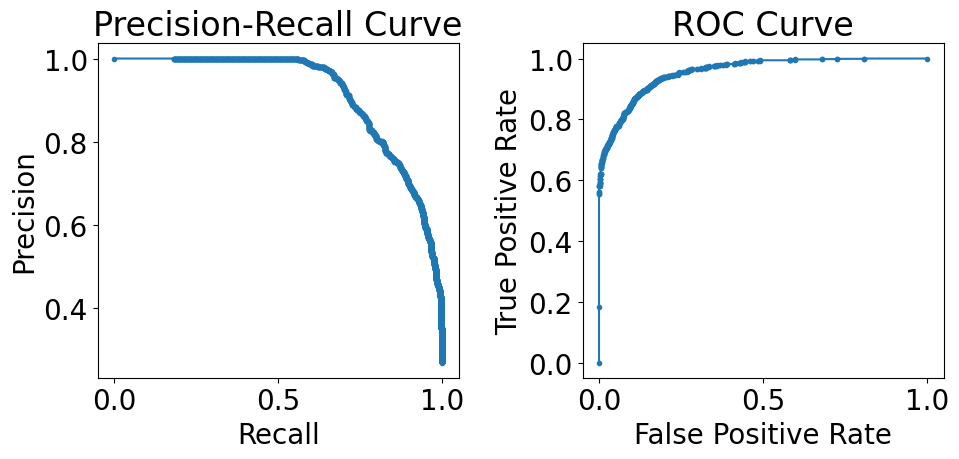

In [95]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.tight_layout()
plt.show()

### 7. Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `ЕКЗ_Прізвище_Ім'я.ipynb`. Окремо додати файли `predictions_reg.csv` та `predictions_clf.csv`.
